In [164]:
##########################
## implement a3 in squin ##
##########################
from bloqade import squin
from bloqade.types import Qubit
from kirin.dialects import ilist
from bloqade.cirq_utils import load_circuit
from bloqade.cirq_utils.emit import emit_circuit
from bloqade.cirq_utils import noise, parallelize, remove_tags
from cirq.contrib.svg import SVGCircuit,circuit_to_svg
import bloqade.stim
import bloqade.tsim
import numpy as np
from math import pi
from typing import Literal


@squin.kernel
def magicstateprep(q: ilist.IList[Qubit, Literal[7]]):
    #squin.h(qubits[ind])
    squin.t(q[2])


def mapping_f(n):
    dicti = {0:1, 1:3, 2:7, 3:6, 4:2, 5:5, 6:4}


'''@squin.kernel
def injection(q: ilist.IList[Qubit, Literal[7]]):
    """Apply magic-state injection to the 7-qubit register `q` (allocated by caller)."""
    squin.reset(q[0:6])
    #squin.h(q[6])
    for i in range(6):
        squin.ry(-pi / 2, q[i])
    squin.cz(q[1], q[2])
    squin.cz(q[3], q[4])
    squin.cz(q[5], q[6])
    squin.ry(pi / 2, q[6])
    squin.cz(q[0], q[3])
    squin.cz(q[2], q[5])
    squin.cz(q[4], q[6])
    for i in range(2, 7):
        squin.ry(pi / 2, q[i])
    for i in range(0, 5, 2):
        squin.cz(q[i], q[i + 1])
    squin.ry(pi / 2, q[1])
    squin.ry(pi / 2, q[2])
    squin.ry(pi / 2, q[4])

    squin.cx(q[0],q[2])
    squin.cx(q[2],q[0])
    squin.cx(q[0],q[2])

    squin.cx(q[2],q[6])
    squin.cx(q[6],q[2])
    squin.cx(q[2],q[6])

    squin.cx(q[3],q[6])
    squin.cx(q[6],q[3])
    squin.cx(q[3],q[6])

    squin.z(q[3])
    squin.x(q[6])'''

@squin.kernel
def prepare_magic(q):
    squin.h(q)
    squin.t(q)

@squin.kernel
def d5_injection(q: ilist.IList[Qubit, Literal[17]]):
    """d=5 encoding with magic state injection (Bloqade SQUIN)."""  
    #q = squin.qalloc(17)
    
    # Magic state on center qubit
    #prepare_magic(q[7])
    
    # √Y on all ancillas
    squin.ry(pi/2, q[0])
    squin.ry(pi/2, q[1])
    squin.ry(pi/2, q[2])
    squin.ry(pi/2, q[3])
    squin.ry(pi/2, q[4])
    squin.ry(pi/2, q[5])
    squin.ry(pi/2, q[6])
    # skip q[7] - has magic state
    squin.ry(pi/2, q[8])
    squin.ry(pi/2, q[9])
    squin.ry(pi/2, q[10])
    squin.ry(pi/2, q[11])
    squin.ry(pi/2, q[12])
    squin.ry(pi/2, q[13])
    squin.ry(pi/2, q[14])
    squin.ry(pi/2, q[15])
    squin.ry(pi/2, q[16])
    
    # CZ Layer 1
    squin.cz(q[1], q[3])
    squin.cz(q[7], q[10])
    squin.cz(q[12], q[14])
    squin.cz(q[13], q[16])
    
    # √Y† on center
    squin.ry(-pi/2, q[7])
    squin.ry(-pi/2, q[16])
    
    # CZ Layer 2
    squin.cz(q[4], q[7])
    squin.cz(q[8], q[10])
    squin.cz(q[11], q[14])
    squin.cz(q[15], q[16])
    
    # √Y† layer
    squin.ry(-pi/2, q[4])
    squin.ry(-pi/2, q[10])
    squin.ry(-pi/2, q[14])
    squin.ry(-pi/2, q[16])

    
    # CZ Layer 3
    squin.cz(q[2], q[4])
    squin.cz(q[6], q[8])
    squin.cz(q[7], q[9])
    squin.cz(q[10], q[13])
    squin.cz(q[14], q[16])

    #√Y Layer 2
    for i in (3,6,9,10,12,13):
        squin.ry(pi/2, q[i])
    
    # CZ Layer 4
    squin.cz(q[0],q[2])
    squin.cz(q[3],q[6])
    squin.cz(q[5],q[8])
    squin.cz(q[10],q[12])
    squin.cz(q[11],q[13])



    # Final √Y
    squin.ry(pi/2, q[1])
    squin.ry(pi/2, q[2])
    squin.ry(pi/2, q[3])
    squin.ry(pi/2, q[4])
    squin.ry(pi/2, q[6])
    squin.ry(pi/2, q[7])
    squin.ry(pi/2, q[8])
    squin.ry(pi/2, q[9])
    squin.ry(pi/2, q[11])
    squin.ry(pi/2, q[12])
    squin.ry(pi/2, q[14])

    # Final CZ 
    squin.cz(q[0], q[1])
    squin.cz(q[2], q[3])
    squin.cz(q[4], q[5])
    squin.cz(q[6], q[7])
    squin.cz(q[8], q[9])
    squin.cz(q[12], q[15])

    # Final √Y†
    squin.ry(-pi/2, q[0])
    squin.ry(-pi/2, q[2])
    squin.ry(-pi/2, q[5])
    squin.ry(-pi/2, q[6])
    squin.ry(-pi/2, q[8])
    squin.ry(-pi/2, q[10])
    squin.ry(-pi/2, q[12])

    squin.z(q[8])
    squin.z(q[14])
    squin.z(q[15])
    squin.z(q[1])
    squin.x(q[5])
    squin.x(q[8])
    squin.x(q[14])


@squin.kernel
def main():
    q = squin.qalloc(17)
    d5_injection(q)
    
circ = emit_circuit(main)
circ_load = load_circuit(circ)
circ_stim = bloqade.stim.Circuit(circ_load)
print(circ_stim.flow_generators())
graph = circ_stim.diagram(type="timeline-svg")
#graph

[stim.Flow("X16 -> Z15*Z16"), stim.Flow("Z16 -> X11*X13*X14*X16"), stim.Flow("_______________X_ -> -_______________Z_"), stim.Flow("_______________Z_ -> ____________X_XXX"), stim.Flow("______________X__ -> ______________Z_Z"), stim.Flow("______________Z__ -> __________XXX_X__"), stim.Flow("_____________X___ -> -___________X_X___"), stim.Flow("_____________Z___ -> __________Z_ZZ__Z"), stim.Flow("____________X____ -> __________X_X____"), stim.Flow("____________Z____ -> ____________Z_ZZZ"), stim.Flow("___________X_____ -> -___________X_____"), stim.Flow("___________Z_____ -> ___________Z_ZZ_Z"), stim.Flow("__________X______ -> __________XX_X___"), stim.Flow("__________Z______ -> __ZZZ__ZZ_Z_Z__Z_"), stim.Flow("_________X_______ -> _________Z_______"), stim.Flow("_________Z_______ -> ______XXXX_______"), stim.Flow("________X________ -> ________ZZ_______"), stim.Flow("________Z________ -> __XX_XX_X_XX_X___"), stim.Flow("_______X_________ -> ______XX__XX_X___"), stim.Flow("_______Z_________ 

[stim.Flow("X16 -> X16"), stim.Flow("Z16 -> Z10*Z11*Z15*Z16"), stim.Flow("_______________X_ -> __________Z____Z_"), stim.Flow("_______________Z_ -> ____________X_XXX"), stim.Flow("______________X__ -> __________Z_Z_Z__"), stim.Flow("______________Z__ -> ___________X_XX_X"), stim.Flow("_____________X___ -> _______Z__ZZ_Z___"), stim.Flow("_____________Z___ -> _X_X__XX_________"), stim.Flow("____________X____ -> ____________X_X__"), stim.Flow("____________Z____ -> Z_Z_______Z_Z__Z_"), stim.Flow("___________X_____ -> ___________X_X__X"), stim.Flow("___________Z_____ -> __________ZZZ_Z__"), stim.Flow("__________X______ -> __________Z______"), stim.Flow("__________Z______ -> __________X__XXX_"), stim.Flow("_________X_______ -> ________ZZ_______"), stim.Flow("_________Z_______ -> XX___X_X_X__XXX__"), stim.Flow("________X________ -> ________XX_______"), stim.Flow("________Z________ -> _ZZ_Z__ZZ________"), stim.Flow("_______X_________ -> _X_X___X_____X___"), stim.Flow("_______Z_________ -> _Z_Z

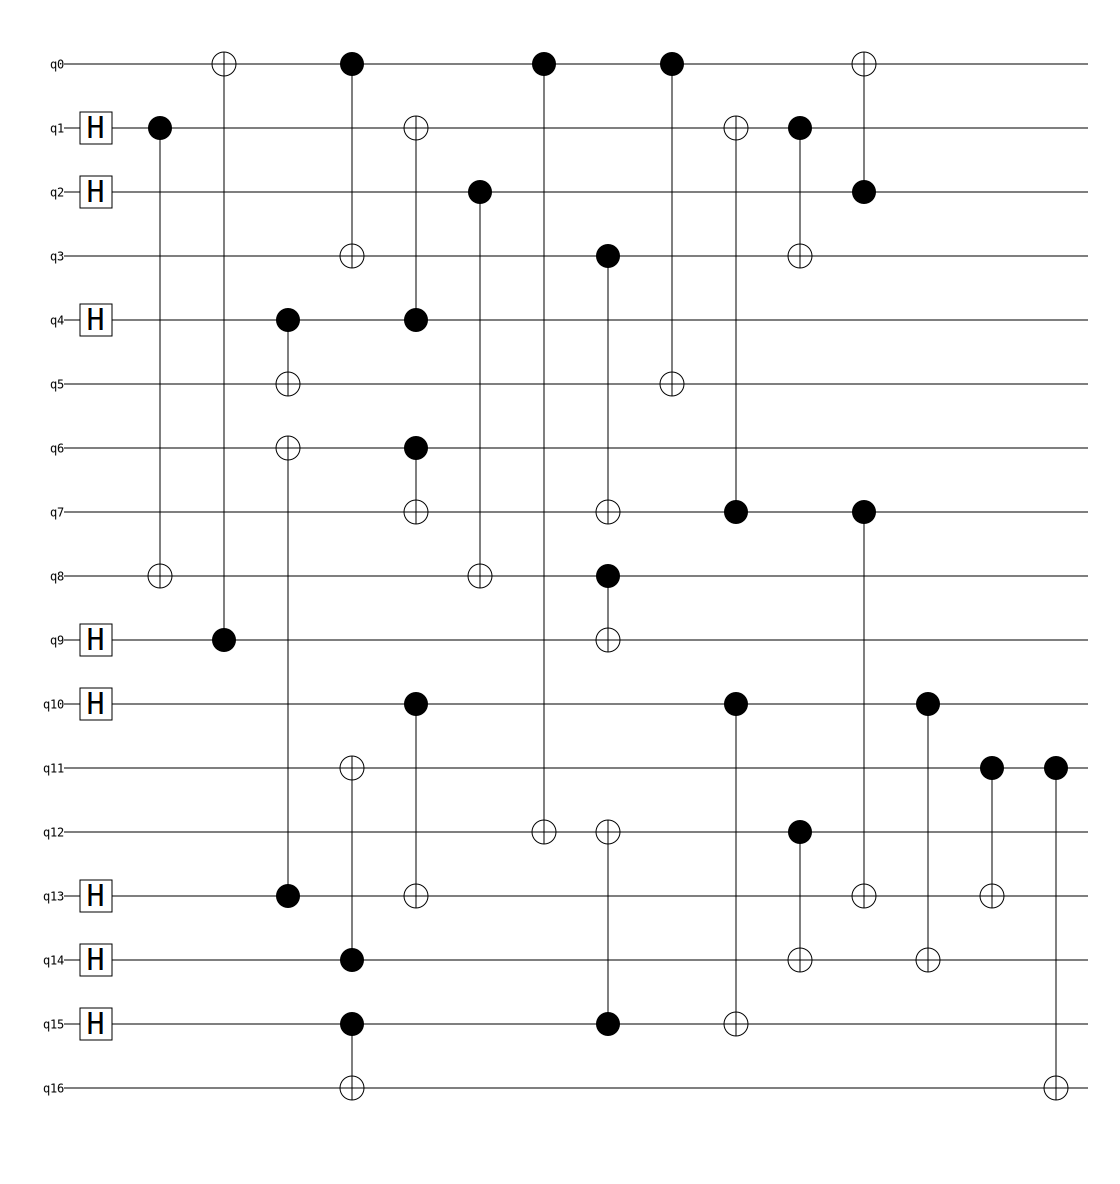

In [165]:
# ---------------------------------------------------------------------------
# Steane [[17,1,5]] Encoding Functions
# ---------------------------------------------------------------------------
@squin.kernel
def svntn_encode_zero_on(q: ilist.IList[Qubit, Literal[17]]):
    """Encode |0⟩^17 → |0⟩_L on the 7-qubit register q (2D [[17,1,5]])."""
    '''for i in (1,2,4,6,11,12,14,16):
        squin.h(q[i])
    squin.cx(q[1],q[13])
    squin.cx(q[12],q[0])
    squin.cx(q[0],q[3])
    squin.cx(q[4],q[5])
    squin.cx(q[6],q[9])
    squin.cx(q[11],q[10])
    squin.cx(q[4],q[1])
    squin.cx(q[16],q[7])
    squin.cx(q[14],q[6])
    squin.cx(q[9],q[8])
    squin.cx(q[2],q[13])
    squin.cx(q[0],q[15])
    squin.cx(q[3],q[8])
    squin.cx(q[13],q[12])
    squin.cx(q[16],q[15])
    squin.cx(q[0],q[5])
    squin.cx(q[14],q[16])
    squin.cx(q[8],q[1])
    squin.cx(q[15],q[11])
    squin.cx(q[1],q[3])
    squin.cx(q[8],q[6])
    squin.cx(q[14],q[11])
    squin.cx(q[2],q[0])
    squin.cx(q[10],q[6])
    squin.cx(q[10],q[7])'''

    '''for i in (1,2,4,10,14,9,13,15):
        squin.h(q[i])
    squin.cx(q[1],q[8])
    squin.cx(q[9],q[0])
    squin.cx(q[0],q[3])
    squin.cx(q[4],q[5])
    squin.cx(q[10],q[6])
    squin.cx(q[14],q[11])
    squin.cx(q[4],q[1])
    squin.cx(q[15],q[12])
    squin.cx(q[13],q[10])
    squin.cx(q[6],q[7])
    squin.cx(q[2],q[8])
    squin.cx(q[0],q[16])
    squin.cx(q[3],q[7])
    squin.cx(q[8],q[9])
    squin.cx(q[15],q[16])
    squin.cx(q[0],q[5])
    squin.cx(q[13],q[15])
    squin.cx(q[7],q[1])
    squin.cx(q[16],q[14])
    squin.cx(q[1],q[3])
    squin.cx(q[7],q[10])
    squin.cx(q[13],q[14])
    squin.cx(q[2],q[0])
    squin.cx(q[11],q[10])
    squin.cx(q[11],q[12])'''
    
    #Encode |0⟩^17 → |0⟩_L on the 7-qubit register q (2D [[17,1,5]]).
    for i in (1,2,4,13,14,9,10,15):
        squin.h(q[i])
    squin.cx(q[1],q[8])
    squin.cx(q[9],q[0])
    squin.cx(q[0],q[3])
    squin.cx(q[4],q[5])
    squin.cx(q[13],q[6])
    squin.cx(q[14],q[11])
    squin.cx(q[4],q[1])
    squin.cx(q[15],q[16])
    squin.cx(q[10],q[13])
    squin.cx(q[6],q[7])
    squin.cx(q[2],q[8])
    squin.cx(q[0],q[12])
    squin.cx(q[3],q[7])
    squin.cx(q[8],q[9])
    squin.cx(q[15],q[12])
    squin.cx(q[0],q[5])
    squin.cx(q[10],q[15])
    squin.cx(q[7],q[1])
    squin.cx(q[12],q[14])
    squin.cx(q[1],q[3])
    squin.cx(q[7],q[13])
    squin.cx(q[10],q[14])
    squin.cx(q[2],q[0])
    squin.cx(q[11],q[13])
    squin.cx(q[11],q[16])

    '''cx_list = [
        (1,13), (12, 0), (0,3), (4,5), (6,9), (11,10),
        (4,1), (16,7), (14, 6), (9,8), (2,13), (0,15),
        (3,8), (13,12), (16,15),
        (0,5), (14,16), 
        (8,1), (15,11),
        (1,3), (8,6), (14,11),
        (2,0), (10,6), (10,7)
    ]
    for (src,tgt) in cx_list:
        squin.cx(q[src],q[tgt])'''

@squin.kernel
def main2():
    q = squin.qalloc(17)
    svntn_encode_zero_on(q)
    
circ = emit_circuit(main2)
circ_load = load_circuit(circ)
circ_stim = bloqade.stim.Circuit(circ_load)
print(circ_stim.flow_generators())
graph = circ_stim.diagram(type="timeline-svg")


@squin.kernel
def svntn_encode_plus_on(q: ilist.IList[Qubit, Literal[17]]):
    """Encode 7 qubits as |+⟩_L: first |0⟩_L then transversal H."""
    svntn_encode_zero_on(q)
    for i in range(17):
        squin.h(q[i])
graph

In [166]:
@squin.kernel
def svntn_circuit():
    """A3 circuit implementation in squin."""
    q = squin.qalloc(51)
    
    #steane_encode_zero_on(q[0:7])
    d5_injection(q[0:17])
    # Qubits 0-6: logical data
    # Qubits 8-14 + 15-21: ancilla block

    # Prepare ancilla as |+⟩_L for first half (X-stabilizer syndrome)
    svntn_encode_plus_on(q[17:34])

    # CNOTs: data → ancilla (X-syndrome extraction)
    for i in range(17):
        squin.cx(q[i], q[i+17])

    # Reset ancilla qubits 8-14
    #for i in range(8, 15):
    #    squin.reset(q[i])
    
    # Prepare ancilla as |0⟩_L for second half (Z-stabilizer syndrome)
    svntn_encode_zero_on(q[34:51])

    # CNOTs: ancilla → data (Z-syndrome extraction)
    for i in range(17):
        squin.cx(q[i+34], q[i])

    # Transversal H on ancilla
    for i in range(17):
        squin.h(q[i+34])
    
    # Measure ancilla qubits 7-21 (Syndrome bits)
    for i in range(17, 51):
        squin.measure(q[i])

In [167]:

# ---------------------------------------------------------------------------
# Execute and sample
# ---------------------------------------------------------------------------

loops = 1
shots_per_loop = 1000
all_samples = []

# Noise channel
noise_model = noise.GeminiOneZoneNoiseModel(scaling_factor=1)

for i in range(loops):
    # Generate circuit
    cirq_enc = emit_circuit(svntn_circuit)
    # Parallelize a circuit
    parallel_circuit = parallelize(cirq_enc)
    # Remove internal tags (for cleaner visualization)
    parallel_circuit = remove_tags(parallel_circuit)
    #svg_text = SVGCircuit(parallel_circuit)._repr_svg_()

    #with open("circuit.svg", "w", encoding="utf-8") as f:
    #    f.write(svg_text)
    print("I am before the transform")
    # Apply noise to this circuit
    noisy_cirq_enc = noise.transform_circuit(cirq_enc, model=noise_model)
    print("I am at this stage")
    # Convert to stim circuit and sample
    squin_enc = load_circuit(noisy_cirq_enc)
    stim_enc = bloqade.tsim.Circuit(squin_enc)
    sampler = stim_enc.compile_sampler()
    print("I am at that stage")
    # Sample this noisy circuit
    samples = sampler.sample(shots=shots_per_loop)
    all_samples.extend(samples)

samples_enc = np.array(all_samples)

# Show diagram from last circuit

print("MSD/Steane encoding A3 circuit: 15 qubits (7 data + 7 ancilla + 1 unused)")
print(f"Total samples collected: {len(samples_enc)} ({loops} loops × {shots_per_loop} shots)")
print("Sample shape:", samples_enc.shape)
print("First 5 shots:\n", samples_enc[:5])
print(f"Error rate: {np.count_nonzero(samples_enc)/len(samples_enc):.4f}")

I am before the transform
I am at this stage
I am at that stage
MSD/Steane encoding A3 circuit: 15 qubits (7 data + 7 ancilla + 1 unused)
Total samples collected: 1000 (1 loops × 1000 shots)
Sample shape: (1000, 34)
First 5 shots:
 [[False  True  True False  True False  True False False  True  True False
   True  True  True  True False  True  True False False  True False  True
  False False  True  True  True False False  True  True  True]
 [ True  True  True  True  True  True  True  True False False  True  True
   True False  True  True  True False False  True  True  True False False
   True False False False  True False False  True False False]
 [False False False False  True  True False False  True  True False False
  False False False False False False False  True False  True False False
  False  True False  True False  True False False  True  True]
 [ True False False  True  True False  True False  True False  True  True
   True  True  True  True  True False False  True  True False

In [168]:

synd_dict = {
    1: [0, 4, 5, 2],
    2: [6, 7, 9, 8],
    3: [11, 13, 16, 14],
    4: [1, 0, 2, 3], #this: 5,8,14
    5: [4, 7, 6, 5],
    6: [10, 11, 14, 12],
    7: [3, 2, 5, 6, 8, 13, 11, 10], #this
    8: [12, 14, 16, 15]
    }

'''synd_dict = {
    1: [0, 1, 2, 3],
    2: [0, 2, 4, 5],
    3: [4, 5, 8, 9],
    4: [6, 7, 10, 11],
    5: [8, 9, 12, 13],
    6: [10, 11, 14, 15],
    7: [7, 11, 15, 16],
    8: [2, 3, 5, 6, 9, 10, 13, 14]
}'''

'synd_dict = {\n    1: [0, 1, 2, 3],\n    2: [0, 2, 4, 5],\n    3: [4, 5, 8, 9],\n    4: [6, 7, 10, 11],\n    5: [8, 9, 12, 13],\n    6: [10, 11, 14, 15],\n    7: [7, 11, 15, 16],\n    8: [2, 3, 5, 6, 9, 10, 13, 14]\n}'

In [169]:
def to_parity(li):
    li_new = [-2*el+1 for el in li]
    return li_new

li = [False, True, False]

In [170]:
def find_syndrome(li, idx):
    li = to_parity(li)
    mult = 1
    for ind in idx:
        mult *= li[ind]
    return True if mult == 1 else False


In [171]:
def findZSyndrome(sample,idx):
    sample_z = sample[0:17]
    return find_syndrome(sample_z,idx)

def findXSyndrome(sample,idx):
    sample_x = sample[17:34]
    return find_syndrome(sample_x,idx)

In [172]:
def compute_syndromes(sample,ind_dict):
    x_synds = []
    z_synds = []
    for key in list(ind_dict.keys()):
        idx = ind_dict[key]
        x_synds.append(findXSyndrome(sample,idx))
        z_synds.append(findZSyndrome(sample,idx))
    return x_synds,z_synds

In [177]:
def find_good_rate(samples,ind_dict):
    tot_samples = len(samples)
    good_samples = 0
    for j,sample in enumerate(samples):
        synd = compute_syndromes(sample,ind_dict)
        print(synd)
        will_add = 1 if np.count_nonzero(synd) == 16 else 0
        good_samples+=will_add
    return (good_samples)/len(samples)

In [178]:
print(find_good_rate(samples_enc,synd_dict))

([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, Tru

1.0
([False, False, False, False, False, False, False, True], [True, True, True, True, True, True, True, True])
([True, False, True, True, True, True, True, False], [True, False, True, True, False, True, True, True])
([True, True, True, True, True, False, False, True], [False, False, True, False, True, True, True, True])
([False, False, True, True, False, True, False, True], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, False, True, False], [True, True, True, True, True, True, False, True])
([True, True, True, True, True, True, False, True], [True, True, True, True, True, True, True, True])
([True, True, True, False, False, False, False, False], [True, True, True, True, True, True, True, True])
([True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, False, True, True, True, True, True, True], [True, True, True, True, True, True, True, True])
([True, False, True, True, True, True, True, True], [True

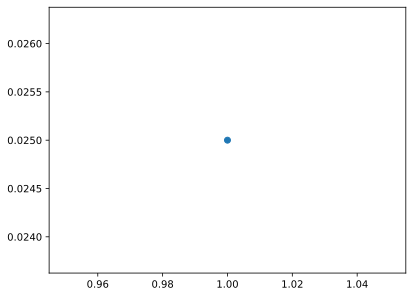

In [180]:

import matplotlib.pyplot as plt
# ---------------------------------------------------------------------------
# Execute and sample
# ---------------------------------------------------------------------------

loops = 1
shots_per_loop = 1000
all_samples = []
fidelities = []

coeffs = np.arange(0.5,1.5,0.1)
coeffs = [1.0]
for coeff in coeffs:
    print(coeff)
    # Noise channel
    noise_model = noise.GeminiOneZoneNoiseModel(scaling_factor=coeff)

    for i in range(loops):
        # Generate circuit
        cirq_enc = emit_circuit(svntn_circuit)
        
        # Apply noise to this circuit
        noisy_cirq_enc = noise.transform_circuit(cirq_enc, model=noise_model)
        
        # Convert to stim circuit and sample
        squin_enc = load_circuit(noisy_cirq_enc)
        stim_enc = bloqade.stim.Circuit(squin_enc)
        sampler = stim_enc.compile_sampler()
        
        # Sample this noisy circuit
        samples = sampler.sample(shots=shots_per_loop)
        all_samples.extend(samples)

    samples_enc = np.array(all_samples)
    fidelities.append(find_good_rate(samples_enc,synd_dict))

plt.scatter(coeffs,fidelities)
plt.show()
    



In [176]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Model: y = A * p^(-n)
def scaling(p, A, n):
    return A * np.power(p, -n)

In [112]:
n0 = 1.0
A0 = fidelities[0] * (coeffs[0] ** n0)  # rough guess
p0 = (A0, n0)

In [113]:
popt, pcov = curve_fit(scaling, coeffs, fidelities, p0=p0, maxfev=10000)
A_fit, n_fit = popt
A_err, n_err = np.sqrt(np.diag(pcov))

print(f"A = {A_fit:.6g} ± {A_err:.2g}")
print(f"n = {n_fit:.6g} ± {n_err:.2g}")

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_16166/1421543822.py:6: RuntimeWarning: divide by zero encountered in power
  return A * np.power(p, -n)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_16166/1421543822.py:6: RuntimeWarning: invalid value encountered in multiply
  return A * np.power(p, -n)


TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

In [114]:
funcs = scaling(coeffs,A_fit,n_fit)

NameError: name 'A_fit' is not defined

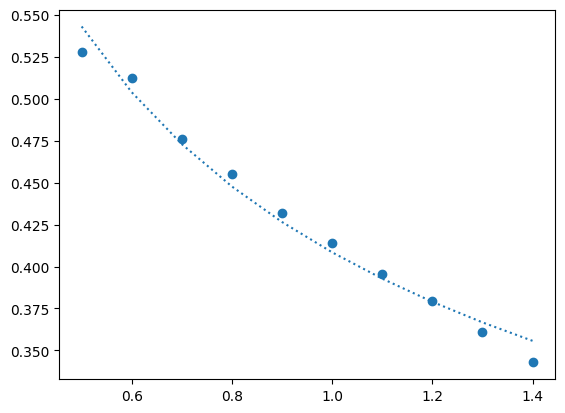

In [ ]:
plt.scatter(coeffs,fidelities)
plt.plot(coeffs,funcs,ls = ":")
plt.show()